<a href="https://colab.research.google.com/github/zaeyonz/Fashion_MNIST/blob/main/Fashoin_MNIST_(Artificial_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fashion MNIST***
- 10종류의 패션 아이템으로 구성되어 있음
- Tensorflow를 사용해 데이터를 불러옴

In [1]:
# Fashoin MNIST data 다운로드

from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- load_data() 함수는 train data 와 test data를 나누어 반환함
- fashion_mnist는 각각 입력과 타깃의 쌍으로 구성되어 있음

In [2]:
# train set의 크기 확인

print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


- train data는 60000개의 이미지로 이루어져 있음, 각 이미지는 28 X 28 크기임
- target data는 60000개의 원소가 있는 1차원 배열임

In [3]:
# test set의 크기 확인

print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


- test set는 10000개의 이미지로 이루어져 있음

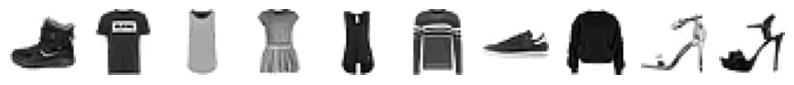

In [4]:
# train data에서 샘플을 그림으로 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

- 크기가 28 X 28이다 보니 작고 흐릿함, 흑백의 이미지임

In [5]:
# 위 샘플들의 타깃값 출력

print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
# unique() 함수로 레이블당 샘플 개수 확인

import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


- 각 레이블마다 정확히 6000개의 샘플이 들어있음

# ***Classify Fashion items using Logistic regression***
- 모델이 60000개나 되기 때문에 전체 데이터를 한꺼번에 사용하여 훈련하는 것보단 ***샘플을 하나씩 꺼내서 모델을 훈련하는게 더 효율적으로 보임***
- SGDClassifier 사용
- SGDClassifier 클래스의 loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델 사용


In [7]:
# SGDClassifier는 2차원 입력을 다루지 못하므로 1차원 배열로 변경

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)

In [8]:
# train_scaled의 크기 확인

print(train_scaled.shape)

(60000, 784)


- 기대한 대로 784개의 픽셀로 이루어진 60000개의 샘플이 준비됨
- cross_validate 함수와 SGDClassifier 클래스를 사용하여 교차 검증 시행

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


- max_iter를 5로 설정함, 반복 횟수를 늘려도 성능이 크게 향상되진 않음

# ***Artuficial Neural Network (ANN, 인공 신경망)***
- 신경망의 최종 값을 만든다는 의미에서 ***출력층***이라함
- 동그라미 하나하나를 ***뉴런 혹은 유닛***이라고 부름
- 처음으로 입력을 받는 뉴런들을 ***입력층***이라고 부름


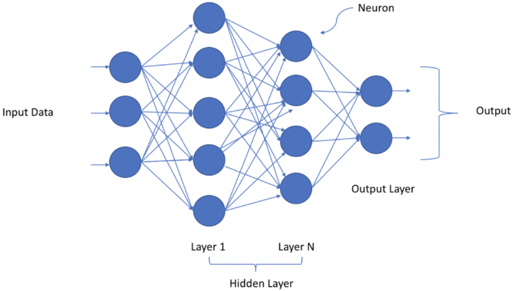

In [10]:
# 텐서플로와 케라스 임포트

import tensorflow as tf
from tensorflow import keras

# ***인공 신경망으로 모델 만들기***
- 앞서 로지스틱 회귀에선 train_scaled와 train_target을 사용하였음
- 또한 교차 검증을 사용해 모델을 평가했지만, ***인공 신경망에선 교차 검증을 사용하지 않고 validation set를 별도로 덜어내어 사용함***

## WHY?
1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증점수가 안정적임
2. 교차 검증을 수행하기엔 훈련 시간이 너무 오래 걸림

In [11]:
# validation set 나누기

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
# train set와 validation set의 크기 확인

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


- 60000개 중의 12000개가 validation set로 분리되었음
- 케라스의 레이어 (keras.layers) 패키지 안에는 다양한 층이 준비되어 있고 ***가장 기본이 되는 층은 밀집층 (dense layer)임***
- 양쪽의 뉴런이 모두 연결돼있는 층을 ***완전 연결층 (fully connected layer)***라고 부름
- 케라스의 Dense 클래스를 사용해 밀집층을 만듦, ***필요한 매개변수는 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기***임

In [13]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

- 10개의 패션 아이템을 분류하기 때문에 첫 번째 매개변수는 10으로 지정
- 다중 분류에선 소프트맥스 함수를 사용하므로 두 번째 매개변수는 softmax로 지정
- 만약 2개의 클래스를 분류하는 이진 분류라면 시그모이드 함수를 사용하기 위해 activision='sigmoid' 와 같이 설정함
- 세 번째 매개변수는 입력값의 크기로 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 설정함
---> 여기에선 784개의 픽셀값을 받음!


In [14]:
model = keras.Sequential(dense)

-  Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달함
- 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 ***활성화 함수 (activation function)***라고 부름

# ***Classify Fashion items using ANN***
## **딥러닝의 절차**
1. import : 필요한 모듈(라이브러리)를 import함
2. 전처리 : 학습에 필요한 데이터 전처리 수행
3. 모델링(model) : 모델을 정의함
4. 컴파일(compile) : 모델을 생성함
5. 학습(fit) : 모델을 학습시킴


In [20]:
# model compile

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')    # 에포크마다 정확도를 출력

- 이진 분류: loss='binary_crossentropy'
- 다중 분류: loss='sparse_categorical_crossentropy'

In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6091 - accuracy: 0.7924
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4739 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4497 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4367 - accuracy: 0.8522
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4292 - accuracy: 0.8554


- 모델의 정확도(accuracy)가 높아짐


In [23]:
# validation set에서의 모델의 성능 확인

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4425 - accuracy: 0.8495


[0.44250741600990295, 0.8495000004768372]

- validation set의 점수는 train set의 점수보다 조금 낮은 것이 일반적임
- 84% 정도의 정확도를 보임